## Data

Release: Advance Monthly Sales for Retail and Food Services  
Units:  Millions of Dollars, Not Seasonally Adjusted

Frequency:  Monthly

The value for the most recent month is an advance estimate that is based on data from a subsample of firms from the larger Monthly Retail Trade Survey. The advance estimate will be superseded in following months by revised estimates derived from the larger Monthly Retail Trade Survey. The associated series from the Monthly Retail Trade Survey is available at https://fred.stlouisfed.org/series/MRTSSM448USN

Information about the Advance Monthly Retail Sales Survey can be found on the Census website at https://www.census.gov/retail/marts/about_the_surveys.html

Suggested Citation:
U.S. Census Bureau, Advance Retail Sales: Clothing and Clothing Accessory Stores [RSCCASN], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/RSCCASN, November 16, 2019.

https://fred.stlouisfed.org/series/RSCCASN

# RNN (Time Series)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import drive

# Google Drive'ı bağla
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/RSCCASN.csv',
                 index_col='DATE',
                 parse_dates=True
                )

In [ ]:
df.columns = ['Sales']

In [ ]:
df.head()

,Sales
DATE,
1992-01-01,6938.000
1992-02-01,7524.000
1992-03-01,8475.000
1992-04-01,9401.000
1992-05-01,9558.000


In [ ]:
df.tail()

,Sales
DATE,
2023-11-01,28580.000
2023-12-01,40684.000
2024-01-01,19188.000
2024-02-01,21964.000
2024-03-01,25293.000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 387 entries, 1992-01-01 to 2024-03-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   387 non-null    float64
dtypes: float64(1)
memory usage: 6.0 KB


<Axes: xlabel='DATE'>

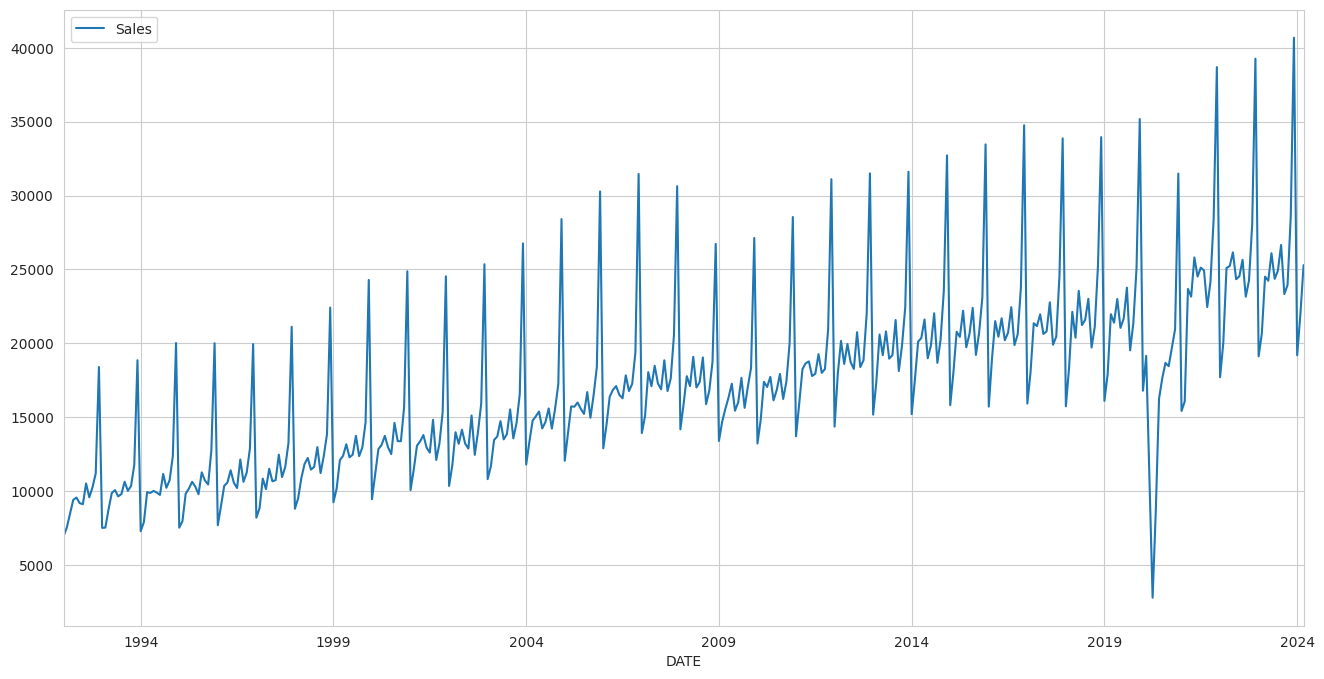

In [ ]:
df.plot(figsize=(16,8))

## Preprocessing of Data
### Train Test Split

In [ ]:
len(df)

387

In [ ]:
test_size = 24

In [ ]:
test_index = len(df)- test_size
test_index

363

In [ ]:
train = df.iloc[:test_index]
test = df.iloc[test_index:]

In [ ]:
len(train)

363

In [ ]:
len(test)

24

In [ ]:
train

,Sales
DATE,
1992-01-01,6938.000
1992-02-01,7524.000
1992-03-01,8475.000
1992-04-01,9401.000
1992-05-01,9558.000
...,...
2021-11-01,28410.000
2021-12-01,38697.000
2022-01-01,17704.000


In [ ]:
test

,Sales
DATE,
2022-04-01,25224.000
2022-05-01,26156.000
2022-06-01,24338.000
2022-07-01,24530.000
2022-08-01,25651.000
2022-09-01,23152.000
2022-10-01,24243.000
2022-11-01,28045.000
2022-12-01,39263.000


## Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Time Series Generator
TimeSeriesGenerator is a tool that simplifies the processing of time series data for RNN (Recurrent Neural Network) models.

RNN models are used to predict the future based on past time steps. TimeSeriesGenerator matches the data set with samples of predetermined length by performing time series windowing. Based on this windowing, input and target data are created.

In the code above, a generator is created for training data using TimeSeriesGenerator. The train_scaled data set is used as both input (X) and target (y) data. The length parameter specifies the length of each time series sample. In other words, each sample contains length past time steps and is used to predict the next time step.

batch_size determines how many groups the created samples will be divided into. In this way, the model works more efficiently during training.

TimeSeriesGenerator automatically separates the data into samples during the training process and a sample is grouped in each training step. In this way, the RNN model can work more effectively on time series data and make predictions based on past time.

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

The TimeseriesGenerator class is a helper class that allows batches of time series data to be used for training and validation. This class generates batch data for training/validation by taking a set of data points with equal intervals of time series parameters.

The constructor of the class takes the data, targets, length of output sequences, sampling rate, step size, start and end indices, shuffling option, reverse sort option, and batch data size. With these parameters, batch data samples are generated from time series data and targets.

In [ ]:
length = 12    # 12 tane satır al 13'üncüyü tahmin et..
batch_size = 1
generator = TimeseriesGenerator(train_scaled, train_scaled, length = length, batch_size = batch_size)   # shuffle= false

In [ ]:
#310-12 = 298 (batch size= 1 ve stride= 1 olduğu için)

In [ ]:
len(generator)

351

In [ ]:
generator[0]

(array([[[0.11586537],
         [0.13217895],
         [0.15865371],
         [0.1844325 ],
         [0.18880321],
         [0.17833579],
         [0.17613652],
         [0.21538933],
         [0.18922079],
         [0.20817906],
         [0.23415272],
         [0.43481529]]]),
 array([[0.13156649]]))

In [ ]:
X, y = generator[0]

In [ ]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.11586537 0.13217895 0.15865371 0.1844325  0.18880321 0.17833579
 0.17613652 0.21538933 0.18922079 0.20817906 0.23415272 0.43481529]
Predict this y: 
 [[0.13156649]]


## Modelling

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN

In [ ]:
train_scaled.shape

(363, 1)

In [ ]:
n_features = train_scaled.shape[1]
n_features

1

In [ ]:
from keras.layers import Dropout

model = Sequential()
model.add(SimpleRNN(units=128, activation="tanh", input_shape=(length, n_features)))
model.add(Dropout(0.2))  # Dropout katmanı eklendi, dropout oranı 0.2 olarak ayarlandı
model.add(Dense(64, activation="relu"))  # Aktivasyon fonksiyonu olarak "relu" kullanıldı
model.add(Dense(32, activation="tanh"))  # Aktivasyon fonksiyonu olarak "tanh" kullanıldı
model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 128)                 │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,009 (105.50 KB)

 Trainable params: 27,009 (105.50 KB)

 Non-trainable params: 0 (0.00 B)

### EarlyStopping and Validation Generator

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 15)

In [ ]:
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = batch_size)

In [ ]:
len(validation_generator)

12

In [ ]:
model.fit(generator,
                    epochs = 20,
                    validation_data = validation_generator,
                    callbacks = [early_stop])

Epoch 1/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0311 - val_loss: 0.0206
Epoch 2/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0109 - val_loss: 0.0202
Epoch 3/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0058 - val_loss: 0.0311
Epoch 4/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0050 - val_loss: 0.0377
Epoch 5/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0061 - val_loss: 0.0095
Epoch 6/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0069 - val_loss: 0.0090
Epoch 7/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0070 - val_loss: 0.0051
Epoch 8/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0077 - val_loss: 0.0077
Epoch 9/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0069 - val_loss: 0.0213
Epoch 10/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0056 - val_loss: 0.0038
Epoch 11/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0044 - val_loss: 0.0033
Epoch 12/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step

<Axes: >

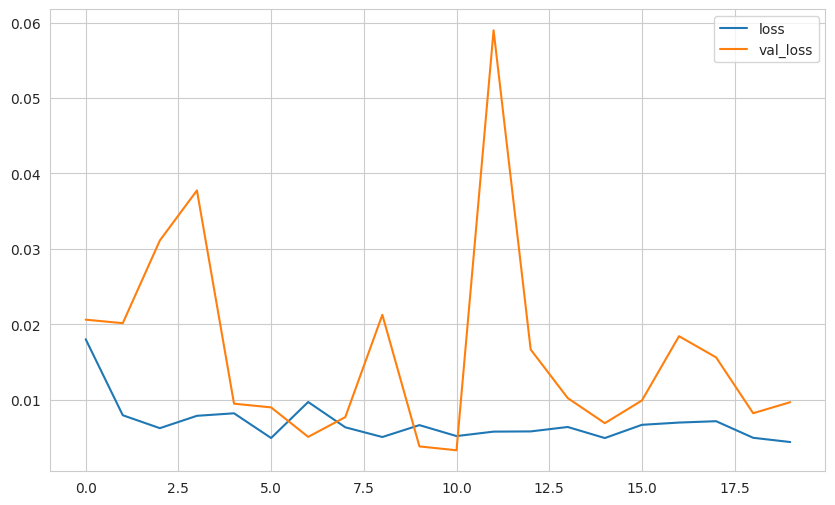

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

## Evaluate on Test Data

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    return print("\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [ ]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):

    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)

    # store prediction
    predictions_scaled.append(current_pred[0])

    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [ ]:
current_pred

array([[0.5304581]], dtype=float32)

In [ ]:
current_batch

array([[[0.50976521],
        [0.56324911],
        [0.50604373],
        [0.47998065],
        [0.53556544],
        [0.48091105],
        [0.48024681],
        [0.55052209],
        [0.81683642],
        [0.36606616],
        [0.40769011],
        [0.53045809]]])

In [ ]:
predictions_scaled

[array([0.5097652], dtype=float32),
 array([0.5632491], dtype=float32),
 array([0.50604373], dtype=float32),
 array([0.47998065], dtype=float32),
 array([0.53556544], dtype=float32),
 array([0.48091105], dtype=float32),
 array([0.4802468], dtype=float32),
 array([0.5505221], dtype=float32),
 array([0.8168364], dtype=float32),
 array([0.36606616], dtype=float32),
 array([0.4076901], dtype=float32),
 array([0.5304581], dtype=float32)]

In [ ]:
eval_metrics(test_scaled[:length], predictions_scaled)


mae: 0.11110470338188894 
mse: 0.013472058299135186 
rmse: 0.11606919616821332


## Retrain and Forecasting - Create Final Model with full Data
The "Create Final model with full data" step is used to create a final RNN model trained on the entire dataset. In this step, the model is retrained using the entire dataset, preserving the weight values ​​of the previously trained model.

This process is usually done when the model is adapted to a more general dataset or when more data is available. A specific subset of data may have been used in the initial training phase, but if the model's performance is expected to increase with more data, this step is performed.

Thus, the "Create Final model with full data" step is used to adapt the model to a larger dataset and increase its performance.

In [ ]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [ ]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = batch_size)

In [ ]:
len(df)

387

In [ ]:
len(generator)

375

In [ ]:
model = Sequential()

model.add(SimpleRNN(units=100, activation="tanh", input_shape=(length, n_features)))
model.add(Dropout(0.2))  # Dropout katmanı eklendi, dropout oranı 0.2 olarak ayarlandı
model.add(Dense(64, activation="relu"))  # Aktivasyon fonksiyonu olarak "relu" kullanıldı
model.add(Dense(32, activation="tanh"))  # Aktivasyon fonksiyonu olarak "tanh" kullanıldı
model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")

# Use model.fit instead of model.fit_generator
model.fit(generator, epochs=15)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0232
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0078
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0081
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0048
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0043
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0039
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0053
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0053
Epoch 9/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0079
Epoch 10/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0041
Epoch 11/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0053
Epoch 12/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0031
Epoch 13/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0030
Epoch 14/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0065
Epoch 15/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - lo

In [ ]:
scaled_full_data.shape

(387, 1)

In [ ]:
scaled_full_data[-length:].shape

(12, 1)

In [ ]:
forecast = []
# Replace periods with whatever forecast length you want

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):

    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)

    # store prediction
    forecast.append(current_pred[0])

    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [ ]:
forecast = scaler.inverse_transform(forecast)

In [ ]:
forecast

array([[23106.70736611],
       [26720.58492798],
       [24946.12065101],
       [26383.07489789],
       [28764.36866462],
       [25892.93951654],
       [23672.11165708],
       [26044.01045936],
       [38460.00624073],
       [22144.25020969],
       [23472.30165982],
       [25790.13873637]])

In [ ]:
df

,Sales
DATE,
1992-01-01,6938.000
1992-02-01,7524.000
1992-03-01,8475.000
1992-04-01,9401.000
1992-05-01,9558.000
...,...
2023-11-01,28580.000
2023-12-01,40684.000
2024-01-01,19188.000


In [ ]:
forecast

array([[23106.70736611],
       [26720.58492798],
       [24946.12065101],
       [26383.07489789],
       [28764.36866462],
       [25892.93951654],
       [23672.11165708],
       [26044.01045936],
       [38460.00624073],
       [22144.25020969],
       [23472.30165982],
       [25790.13873637]])

In [ ]:
forecast_index = pd.date_range(start = '2024-01-01', periods = length, freq = 'MS')

In [ ]:
forecast_index

DatetimeIndex(['2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01',
               '2024-05-01', '2024-06-01', '2024-07-01', '2024-08-01',
               '2024-09-01', '2024-10-01', '2024-11-01', '2024-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [ ]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns = ['Forecast'])

In [ ]:
forecast_df

,Forecast
2024-01-01,23106.707
2024-02-01,26720.585
2024-03-01,24946.121
2024-04-01,26383.075
2024-05-01,28764.369
2024-06-01,25892.940
2024-07-01,23672.112
2024-08-01,26044.010
2024-09-01,38460.006
2024-10-01,22144.250


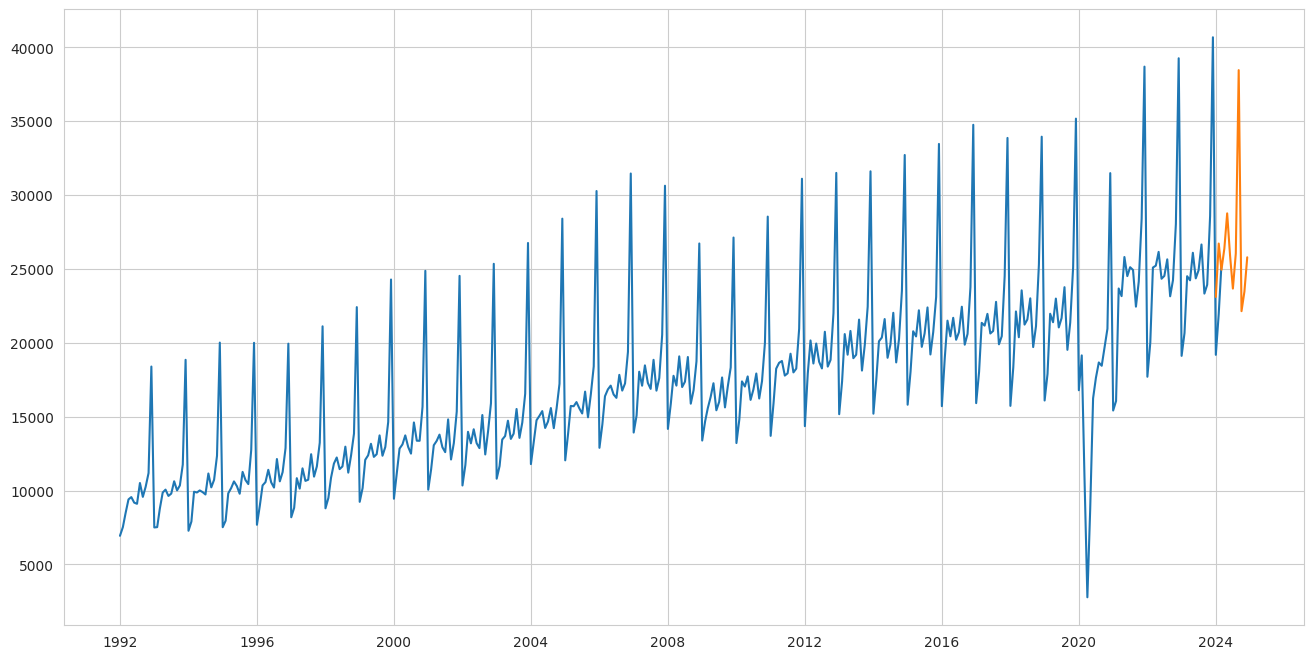

In [ ]:
plt.figure(figsize = (16, 8))
plt.plot(df.index, df['Sales'])
plt.plot(forecast_df.index, forecast_df['Forecast'])

In [ ]:
from keras.models import load_model

# Modeli kaydetme
model.save('final_model1.h5')

## pademi

In [ ]:
forecast_index1 = pd.date_range(start = '2019-11-01', periods = length, freq = 'MS')

In [ ]:
forecast_index1

DatetimeIndex(['2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01'],
              dtype='datetime64[ns]', freq='MS')

In [ ]:
forecast_df1 = pd.DataFrame(data = forecast, index = forecast_index1, columns = ['Forecast'])

In [ ]:
forecast_df1

,Forecast
2019-11-01,23106.707
2019-12-01,26720.585
2020-01-01,24946.121
2020-02-01,26383.075
2020-03-01,28764.369
2020-04-01,25892.940
2020-05-01,23672.112
2020-06-01,26044.010
2020-07-01,38460.006
2020-08-01,22144.250


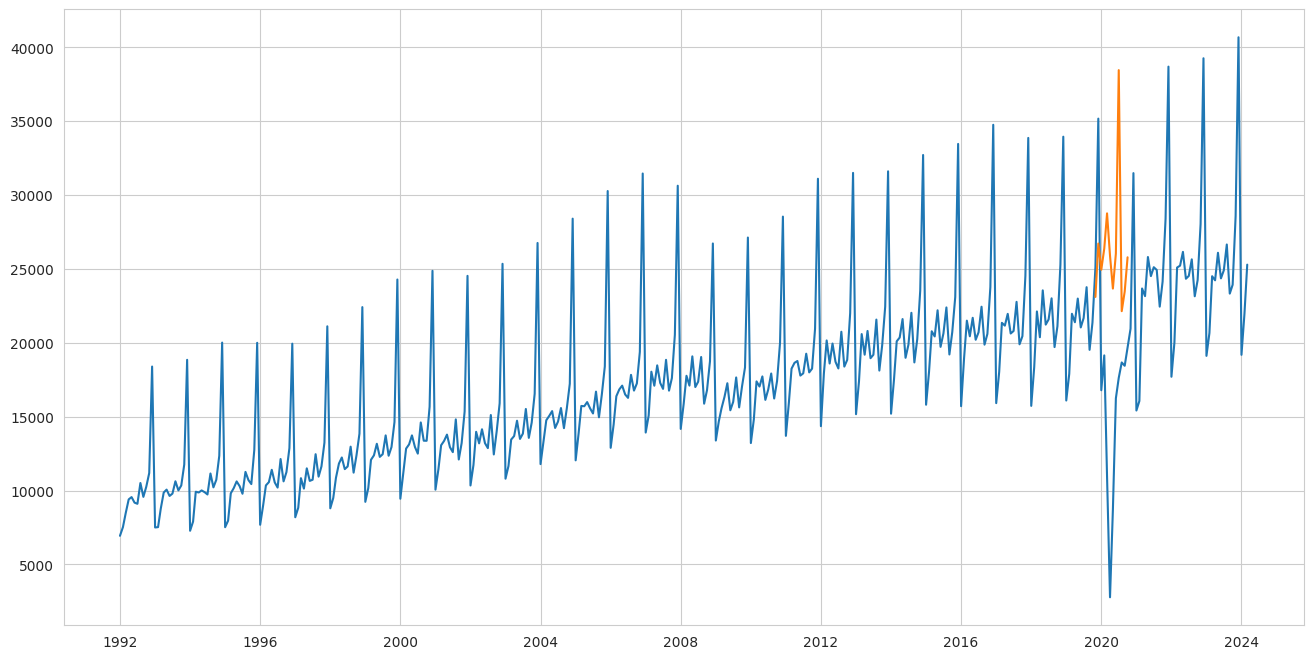

In [ ]:
plt.figure(figsize = (16, 8))
plt.plot(df.index, df['Sales'])
plt.plot(forecast_df1.index, forecast_df1['Forecast'])